In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_8/BankCustomerChurnPrediction.csv')

In [3]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,Female,42,2,0.00,1,yes,yes,101348.88,yes
1,608,Female,41,1,83807.86,1,no,yes,112542.58,no
2,502,Female,42,8,159660.80,3,yes,no,113931.57,yes
3,699,Female,39,1,0.00,2,no,no,93826.63,no
4,850,Female,43,2,125510.82,1,yes,yes,79084.10,no


In [4]:
df = pd.get_dummies(df, columns=['gender', 'credit_card', 'active_member', 'churn'], drop_first=True)

# drop the original categorical columns
# df = df.drop(['gender_Female', 'credit_card_no', 'active_member_no', 'churn_no'], axis=1)

In [5]:
df.head()

,credit_score,age,tenure,balance,products_number,estimated_salary,gender_Male,credit_card_yes,active_member_yes,churn_yes
0,619,42,2,0.00,1,101348.88,0,1,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,113931.57,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,1,0


In [6]:
df = df.rename(columns={'credit_card_yes': 'credit_card', 'active_member_yes': 'active_member'})


# #1

In [7]:
X = df.drop('churn_yes', axis=1)
y = df['churn_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #2

In [8]:
import statsmodels.api as sm
model=sm.Logit(y_train, sm.add_constant(X_train))
lr = model.fit()
print(lr.summary())
p_pred = lr.predict(sm.add_constant(X_test))
y_pred = round(p_pred)
ptrain_pred = lr.predict(sm.add_constant(X_train))
ytrain_pred = round(ptrain_pred)


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              churn_yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                     inf
Time:                        20:25:35   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3848      0.270    -12.559      0.000      -3.913      -2.857
credit_score    

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [9]:
print(lr.pvalues)

const                3.548602e-36
credit_score         2.621274e-02
age                 1.525510e-142
tenure               1.735856e-01
balance              4.164925e-22
products_number      4.125980e-01
estimated_salary     5.165237e-01
gender_Male          2.452927e-19
credit_card          8.948571e-01
active_member        2.217792e-63
dtype: float64


# #3

# #4

In [10]:
zeros = pd.DataFrame(np.zeros((len(X_train), 1)))

X_train = pd.concat([X_train, zeros], axis=1)

zeros = pd.DataFrame(np.zeros((len(X_test), 1)))
X_test = pd.concat([X_test, zeros], axis=1)

train_pred = lr.predict(X_train)
# train_prob = lr.predict_proba(X_train)[:, 1]

test_pred = lr.predict(X_test)
# test_prob = lr.predict_proba(X_test)[:, 1]

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Text(0, 0.5, 'True Positive Rate')

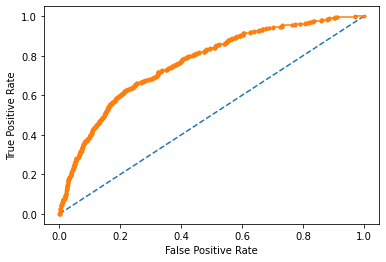

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, p_pred)
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [12]:
auc_score = auc(mr_fpr, mr_tpr)

print('AUC_test:', auc_score)

AUC_test: 0.5


Text(0, 0.5, 'True Positive Rate')

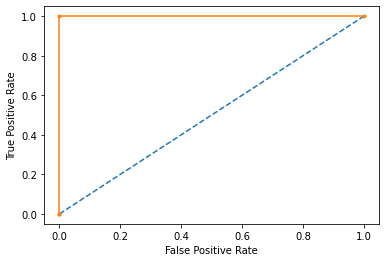

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
mr_probs = [0 for _ in range(len(ytrain_pred))]
mr_fpr, mr_tpr, _ = roc_curve(ytrain_pred, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytrain_pred, ptrain_pred)
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [14]:
auc_score = auc(mr_fpr, mr_tpr)

print('AUC_test:', auc_score)

AUC_test: 0.5


# #5

In [15]:
print(X_test.columns)

Index([    'credit_score',              'age',           'tenure',
                'balance',  'products_number', 'estimated_salary',
            'gender_Male',      'credit_card',    'active_member',
                        0],
      dtype='object')


In [16]:
from sklearn.metrics import confusion_matrix

X_test = X_test.drop(columns=[0])

# X_test_new = sm.add_constant(X_test)

y_pred_proba = lr.predict(X_test_new)
y_pred = (y_pred_proba > 0.5).astype(int)


cm_test = confusion_matrix(y_test, y_pred)
print("Confusion matrix for testing sample:\n", cm_test)

TN = cm_test[0][0]
FP = cm_test[0][1]
FN = cm_test[1][0]
TP = cm_test[1][1]
MR = (FP + FN) / (TN + FP + FN + TP)
TPR = TP / (TP + FN)
FNR = FN / (FN + TP)

print("MR:", MR)
print("TPR:", TPR)
print("FNR:", FNR)


/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


ValueError: Found input variables with inconsistent numbers of samples: [2000, 3590]

In [15]:
from sklearn.metrics import confusion_matrix

X_test = X_test.drop(columns=[0])

X_test_new = sm.add_constant(X_test)

y_test_new = y_test[X_test.index]  # update y_test to match the new number of samples

y_pred_proba = lr.predict(X_test_new)
y_pred = (y_pred_proba > 0.5).astype(int)

cm_test = confusion_matrix(y_test_new, y_pred)
print("Confusion matrix for testing sample:\n", cm_test)

TN = cm_test[0][0]
FP = cm_test[0][1]
FN = cm_test[1][0]
TP = cm_test[1][1]
MR = (FP + FN) / (TN + FP + FN + TP)
TPR = TP / (TP + FN)
FNR = FN / (FN + TP)

print("MR:", MR)
print("TPR:", TPR)
print("FNR:", FNR)


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([   1,    2,    4,    5,    6,\n            ...\n            1995, 1996, 1997, 1998, 1999],\n           dtype='int64', length=1590). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [16]:
from sklearn.metrics import confusion_matrix

# Reindex the test data frame to match the training data frame
X_test = X_test.reindex(columns=X_train.columns[1:])

# Add constant column to the test data frame
X_test_new = sm.add_constant(X_test)

# Make predictions and calculate the confusion matrix
y_pred_proba = lr.predict(X_test_new)
y_pred = (y_pred_proba > 0.5).astype(int)
cm_test = confusion_matrix(y_test, y_pred)

# Calculate MR, TPR, and FNR
TN = cm_test[0][0]
FP = cm_test[0][1]
FN = cm_test[1][0]
TP = cm_test[1][1]
MR = (FP + FN) / (TN + FP + FN + TP)
TPR = TP / (TP + FN)
FNR = FN / (FN + TP)

# Print results
print("Confusion matrix for testing sample:\n", cm_test)
print("MR:", MR)
print("TPR:", TPR)
print("FNR:", FNR)


ValueError: Found input variables with inconsistent numbers of samples: [2000, 3590]

In [15]:
from sklearn.metrics import confusion_matrix

X_test_new = sm.add_constant(X_test)

y_pred_proba = lr.predict(X_test_new)
y_pred = (y_pred_proba > 0.5).astype(int)

# Select the same number of rows as in X_test_new
y_test_new = y_test[:len(X_test_new)]

cm_test = confusion_matrix(y_test_new, y_pred)
print("Confusion matrix for testing sample:\n", cm_test)

TN = cm_test[0][0]
FP = cm_test[0][1]
FN = cm_test[1][0]
TP = cm_test[1][1]
MR = (FP + FN) / (TN + FP + FN + TP)
TPR = TP / (TP + FN)
FNR = FN / (FN + TP)

print("MR:", MR)
print("TPR:", TPR)
print("FNR:", FNR)


ValueError: shapes (3590,11) and (10,) not aligned: 11 (dim 1) != 10 (dim 0)